# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'
units = 'metrics'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | orsa
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | marudi
City not found. Skipping...
Processing Record 5 of Set 1 | ciudad lazaro cardenas
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | bentiu
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | port douglas
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | broken hill
Processing Record 14 of Set 1 | jayapura
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | yaren
Processing Record 18 of Set 1 | shubarshi
Processing Record 19 of Set 1 | mogadishu
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Process

Processing Record 40 of Set 4 | cimarron hills
Processing Record 41 of Set 4 | east london
Processing Record 42 of Set 4 | gadzhiyevo
Processing Record 43 of Set 4 | vila franca do campo
Processing Record 44 of Set 4 | huanggang
Processing Record 45 of Set 4 | popondetta
Processing Record 46 of Set 4 | smach mean chey
City not found. Skipping...
Processing Record 47 of Set 4 | tsiombe
Processing Record 48 of Set 4 | dul'durga
Processing Record 49 of Set 4 | geraldton
Processing Record 0 of Set 5 | utrik
Processing Record 1 of Set 5 | port mathurin
Processing Record 2 of Set 5 | djenne
Processing Record 3 of Set 5 | mount isa
Processing Record 4 of Set 5 | pontes e lacerda
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | gondar
Processing Record 7 of Set 5 | namibe
Processing Record 8 of Set 5 | thunder bay
Processing Record 9 of Set 5 | shar
Processing Record 10 of Set 5 | cesme
Processing Record 11 of Set 5 | lucheng
Processing Record 12 of Set 5 | dhuusamarreeb
P

Processing Record 29 of Set 8 | brookings
Processing Record 30 of Set 8 | agat village
Processing Record 31 of Set 8 | saynshand
Processing Record 32 of Set 8 | codrington
Processing Record 33 of Set 8 | kulhudhuffushi
Processing Record 34 of Set 8 | kapit
Processing Record 35 of Set 8 | port saint john's
Processing Record 36 of Set 8 | vernon
Processing Record 37 of Set 8 | klyuchi
Processing Record 38 of Set 8 | melfort
Processing Record 39 of Set 8 | antalaha
Processing Record 40 of Set 8 | singaparna
Processing Record 41 of Set 8 | hadibu
Processing Record 42 of Set 8 | kariong
Processing Record 43 of Set 8 | gunjur
Processing Record 44 of Set 8 | quellon
Processing Record 45 of Set 8 | timbiqui
Processing Record 46 of Set 8 | vlahita
Processing Record 47 of Set 8 | el porvenir
Processing Record 48 of Set 8 | taroa
Processing Record 49 of Set 8 | nagqu
Processing Record 0 of Set 9 | bangkalan
Processing Record 1 of Set 9 | gamba
Processing Record 2 of Set 9 | katsuura
Processing Re

Processing Record 14 of Set 12 | egilsstadir
Processing Record 15 of Set 12 | banjarmasin
Processing Record 16 of Set 12 | wamba
Processing Record 17 of Set 12 | beidaihehaibin
Processing Record 18 of Set 12 | nema
Processing Record 19 of Set 12 | gubkin
Processing Record 20 of Set 12 | tymovskoye
Processing Record 21 of Set 12 | kapustin yar
Processing Record 22 of Set 12 | tughyl
Processing Record 23 of Set 12 | patong
Processing Record 24 of Set 12 | greymouth
Processing Record 25 of Set 12 | el calafate
Processing Record 26 of Set 12 | san jose de guanipa
Processing Record 27 of Set 12 | walvis bay
Processing Record 28 of Set 12 | revda
Processing Record 29 of Set 12 | mirny
Processing Record 30 of Set 12 | kolonia
Processing Record 31 of Set 12 | zanjan
Processing Record 32 of Set 12 | duong dong
Processing Record 33 of Set 12 | rio san juan
Processing Record 34 of Set 12 | pitkyaranta
Processing Record 35 of Set 12 | levuka
-----------------------------
Data Retrieval Complete   

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,orsa,54.5153,30.4053,281.41,60,100,4.67,BY,1712875413
1,tiksi,71.6872,128.8694,247.47,94,23,5.43,RU,1712875414
2,port-aux-francais,-49.3500,70.2167,279.15,85,100,2.46,TF,1712875414
3,ciudad lazaro cardenas,17.9583,-102.2000,300.45,63,0,3.69,MX,1712875416
4,yellowknife,62.4560,-114.3525,276.44,60,40,4.63,CA,1712875416


In [8]:
# Export the City_Data into a csv
cities_csv= city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,orsa,54.5153,30.4053,281.41,60,100,4.67,BY,1712875413
1,tiksi,71.6872,128.8694,247.47,94,23,5.43,RU,1712875414
2,port-aux-francais,-49.3500,70.2167,279.15,85,100,2.46,TF,1712875414
3,ciudad lazaro cardenas,17.9583,-102.2000,300.45,63,0,3.69,MX,1712875416
4,yellowknife,62.4560,-114.3525,276.44,60,40,4.63,CA,1712875416


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

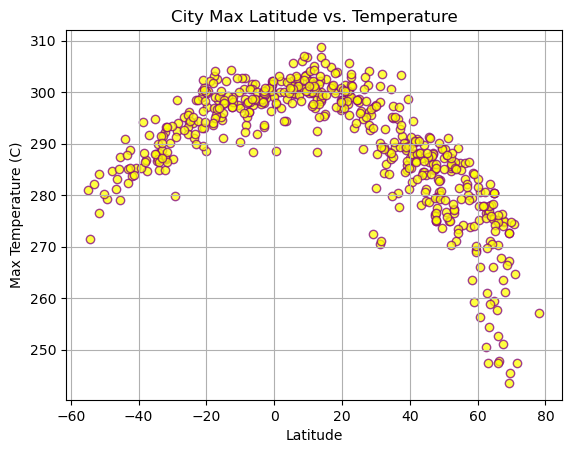

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],facecolor="yellow", edgecolor="purple", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

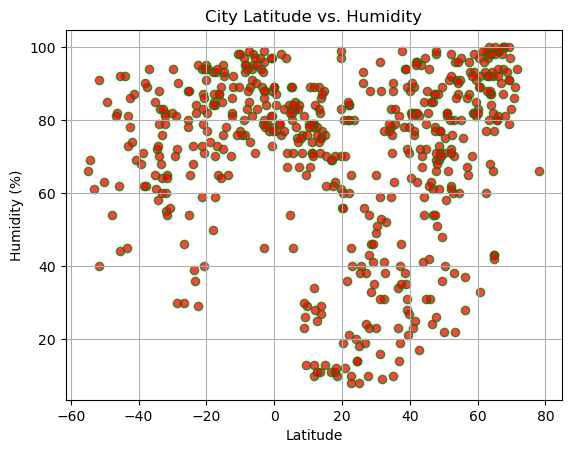

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],facecolor="red", edgecolor="green", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

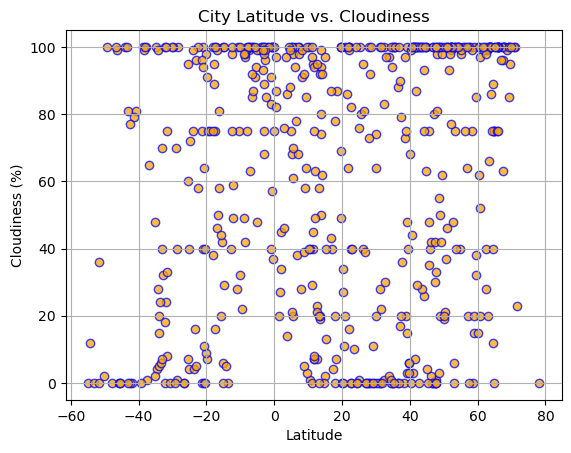

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],facecolor="orange", edgecolor="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

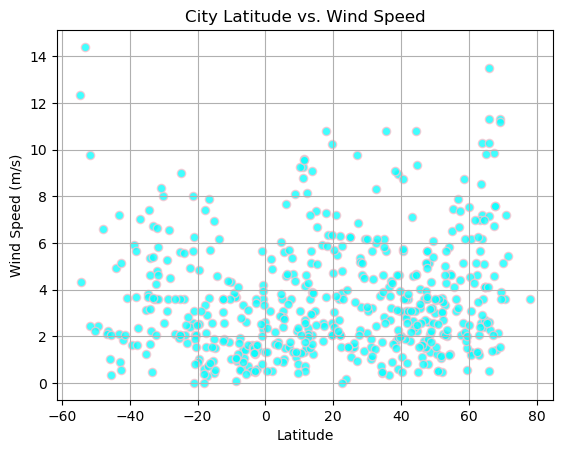

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],facecolor="cyan", edgecolor="pink", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    
    # Calculate the regression line slope and intercept
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
     # Add the regression line to the plot
    regression_value = x_values * slope + intercept
    
    # Add the equation of the line to the plot
    line_eq = "y =" +  str(round(slope, 2)) + "x+" + str(round(intercept, 2))  
    
    # Add labels and a title to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Create a scatter plot of the x and y values
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_value, 'r-')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    
    #Print out r value 
    print(f'the r-value is: {rvalue**2}')
    
    # Show the plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,orsa,54.5153,30.4053,281.41,60,100,4.67,BY,1712875413
1,tiksi,71.6872,128.8694,247.47,94,23,5.43,RU,1712875414
3,ciudad lazaro cardenas,17.9583,-102.2000,300.45,63,0,3.69,MX,1712875416
4,yellowknife,62.4560,-114.3525,276.44,60,40,4.63,CA,1712875416
5,bentiu,9.2333,29.8333,303.31,13,85,2.22,SS,1712875417


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,279.15,85,100,2.46,TF,1712875414
8,port douglas,-16.4833,145.4667,298.44,65,50,3.66,AU,1712875181
11,broken hill,-31.9500,141.4333,287.01,55,24,4.79,AU,1712875421
12,jayapura,-2.5333,140.7000,298.81,84,85,0.61,ID,1712875421
13,bredasdorp,-34.5322,20.0403,286.67,72,4,3.79,ZA,1712875422


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: 0.7184711410028893


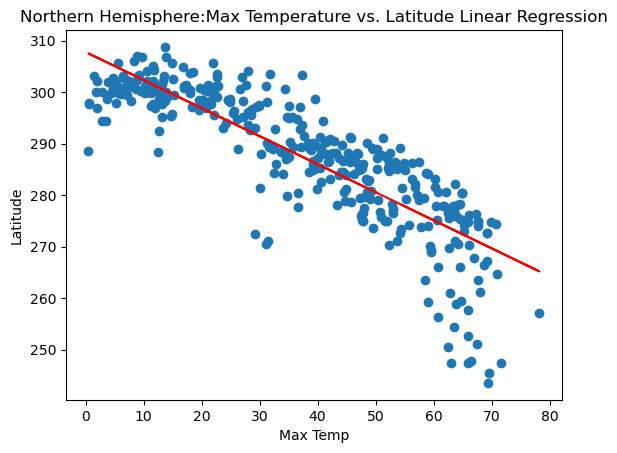

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Max Temp"
y_label = "Latitude"
title = "Northern Hemisphere:Max Temperature vs. Latitude Linear Regression"
text_coordinates = (10,-20)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

### Discussion about the linear relationship:

There is a very strong negative correlation between max temperature and latitude on the northern Hemisphere.The number of latitude in the northern hemisphere accountes for 71.0% (r-value = 0.7116...) of the variation in max temperature which means that the latitude in the northern hemisphere itself 'strongly' explain the variation in max temperature.

the r-value is: 0.6769312990869428


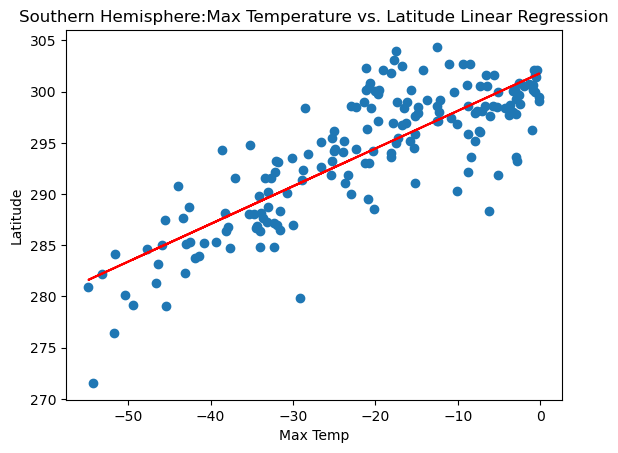

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Max Temp"
y_label = "Latitude"
title = "Southern Hemisphere:Max Temperature vs. Latitude Linear Regression"
text_coordinates = (-25,10)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

### Discussion about the linear relationship: 
There is a weak positive correlation between a temperature and latitude on the southern Hemisphere.The number of latitude in the sourthern hemisphere accountes for 65.2% (r-value = 0.6522...) of the variation in max temperature which means that the latitude in the southern hemisphere itself 'weakly' explain the variation in max temperature.

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.07995606114327802


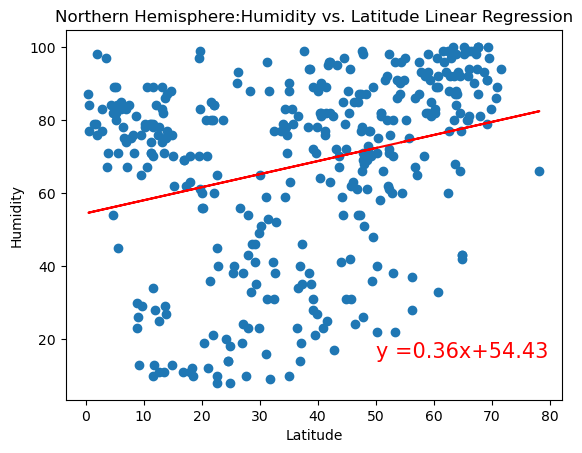

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title = "Northern Hemisphere:Humidity vs. Latitude Linear Regression"
text_coordinates = (50,15)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

### Discussion about the linear relationship: 
There is very weak positive correlation between a humidity and latitude on the Northern Hemisphere.The number of latitude in the Northern hemisphere accountes for 12.69% (r-value = 0.1269...) of the variation in humidity which means that the latitude in the Northern hemisphere itself doesnt really explain the variation in humidity.

the r-value is: 0.14929009960527215


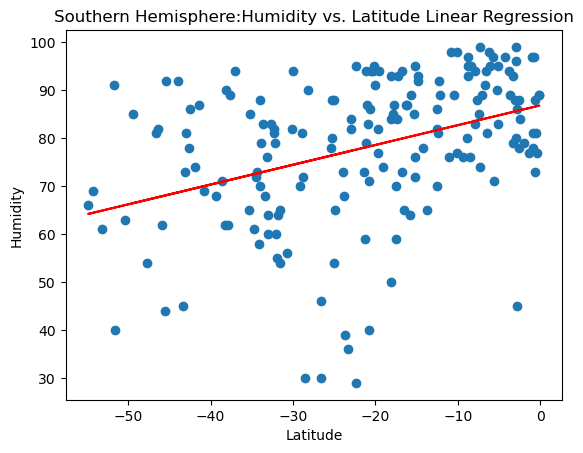

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title = "Southern Hemisphere:Humidity vs. Latitude Linear Regression"
text_coordinates = (-55,15)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

### Discussion about the linear relationship: 
 There is no correlation between a humidity and latitude on the Southern Hemisphere.The number of latitude in the southern hemisphere accountes for 7.64% (r-value = 0.0764...) of the variation in humidity which means that the latitude in the southern hemisphere itself doesnt explain the variation in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.035823555644622015


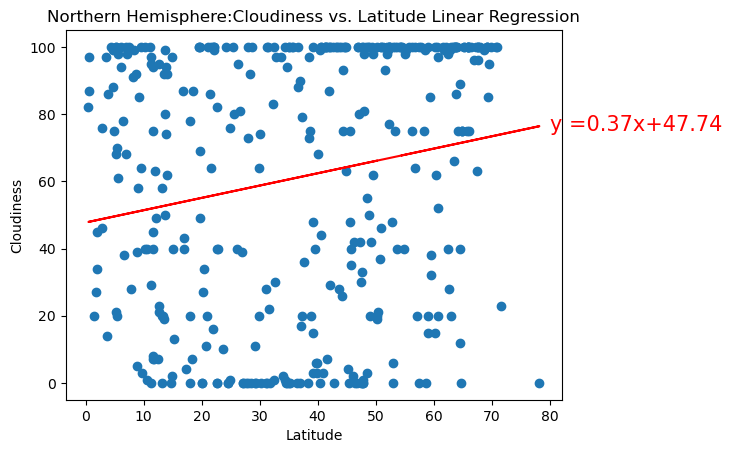

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title = "Northern Hemisphere:Cloudiness vs. Latitude Linear Regression"
text_coordinates = (80,75)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

### Discussion about the linear relationship: 
There is no correlation between a cloudiness and latitude on the Northern Hemisphere.The number of latitude in the Northern hemisphere accountes for 4.28% (r-value = 0.0428...) of the variation in cloudiness which means that the latitude in the Northern hemisphere itself doesnt explain the variation in cloudiness.

the r-value is: 0.1806935852954666


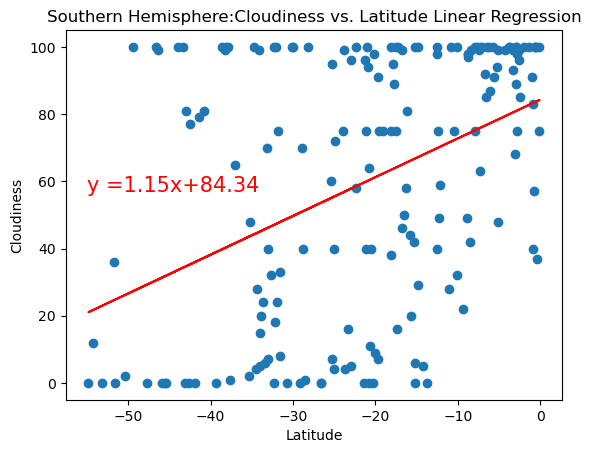

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title = "Southern Hemisphere:Cloudiness vs. Latitude Linear Regression"
text_coordinates = (-55,57)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

### Discussion about the linear relationship: 
There is no correlation between a cloudiness and latitude on the Southern Hemisphere.The number of latitude in the southern hemisphere accountes for 6.27% (r-value = 0.0627...) of the variation in cloudiness which means that the latitude in the southern hemisphere itself doesnt explain the variation in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.015048886053732691


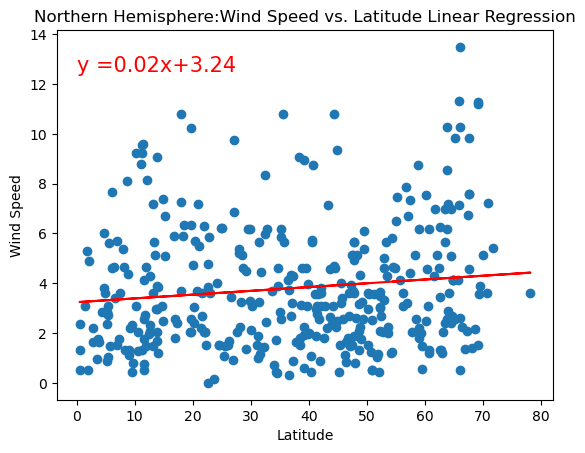

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title = "Northern Hemisphere:Wind Speed vs. Latitude Linear Regression"
text_coordinates = (0,12.5)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

### Discussion about the linear relationship: 
There is no correlation between wind speed and latitude on the Northern Hemisphere.The number of latitude in the Northern Hemisphere accountes for 0.06% (r-value = 0.0006...) of the variation in wind speed which means that the latitude in the Northern Hemisphere itself doesnt explain the variation in wind speed.

the r-value is: 0.1425700795243832


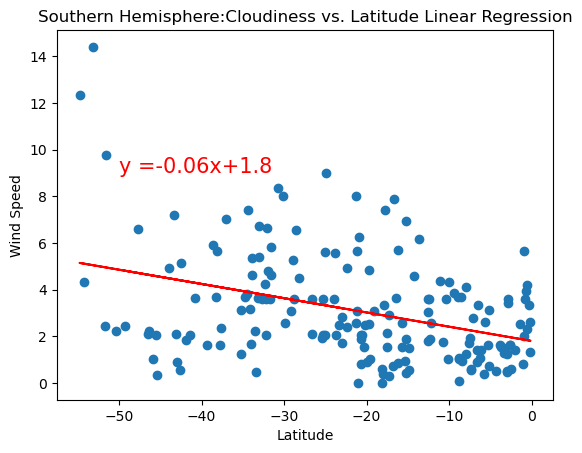

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title = "Southern Hemisphere:Cloudiness vs. Latitude Linear Regression"
text_coordinates = (-50,9)

plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates)

### Discussion about the linear relationship:
There is a very weak negative correlation between wind speed and latitude on the Southern Hemisphere.The number of latitude in the southern hemisphere accountes for 11.34% (r-value = 0.1134...) of the variation in wind speed which means that the latitude in the southern hemisphere itself doesnt explain the variation in wind speed.